In [1]:
import numpy as np
from HestonFunctions_copy import Heston_explicit_bf, HestonCallClosedForm
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import newton
import math

In [2]:
def BlackScholesCall(S0, K, tau, r, sigma, EPS=0.01):
    d1 = (math.log(S0 / K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    d2 = d1 - sigma * math.sqrt(tau)
    
    if tau < EPS:
        return max(S0 - K, 0)
    else:
        return S0 * norm.cdf(d1) - K * math.exp(-r * tau) * norm.cdf(d2)

def ImpliedVolCall(S0, K, tau, r, Heston_price):
    def f(x):
        return BlackScholesCall(S0, K, tau, r, x) - Heston_price

    if f(-1) * f(1) > 0:
        return None

    # result = opt.root_scalar(f, bracket=[-1, 1], method='brentq')
    # return result.root

    initial_guess = 0.2
    try:
        iv = newton(f, initial_guess)
        return iv
    except RuntimeError:
        return np.nan

In [3]:
def imp_vol(kappa=0.1, eta=0.02, sigma=0.2, rho=0, V0=0.02, r=0.03, T=10, S0=100):
    tau_range = np.linspace(0.01, 10, 50)  # Time to maturity in years
    K_range = np.linspace(80, 120, 50)  # Strike prices range
    X, Y = np.meshgrid(tau_range, K_range)
    Z = np.zeros_like(X)

    # kappa=0.1
    # eta=0.02
    # sigma=0.2
    # rho=0
    # V0=0.02
    # r=0.03
    # T=10
    # S0=100

    for i in range(len(tau_range)):
        for j in range(len(K_range)):
            tau = tau_range[i]
            K = K_range[j]
            # Assuming HestonCallClosedForm and ImpliedVolCall are predefined functions
            price = HestonCallClosedForm(kappa, eta, sigma, rho, V0, r, tau, S0, K)
            implied_vol = ImpliedVolCall(S0, K, tau, r, price)
            Z[i, j] = implied_vol if implied_vol is not None else np.nan

    return X, Y, Z

In [6]:
def plot_imp_vol(Z_base, Z_e1, Z_e2, change_param):
    # Time to maturity values from your imp_vol function
    tau_range = np.linspace(0.01, 10, 50)

    # Find the index for maturity of 1 year and 10 years
    index_maturity_1 = (np.abs(tau_range - 1)).argmin()
    index_maturity_10 = (np.abs(tau_range - 10)).argmin()

    # # Extract slices for the two maturities
    slice_maturity_1 = Z_base[index_maturity_1, :]
    slice_maturity_10 = Z_base[index_maturity_10, :]

    slice_maturity_e1 = Z_e1[index_maturity_1, :]
    slice_maturity_e10 = Z_e1[index_maturity_10, :]

    slice_maturity_e2_1 = Z_e2[index_maturity_1, :]
    slice_maturity_e2_10 = Z_e2[index_maturity_10, :]

    # Strike prices range from your imp_vol function
    K_range = np.linspace(80, 120, 50)

    # Plotting the slices
    plt.figure(figsize=(14, 6))

    # Plot for maturity = 1
    plt.subplot(1, 2, 1)
    plt.plot(K_range, slice_maturity_e1, label=f'low {change_param}')
    plt.plot(K_range, slice_maturity_1, label = 'base condition')
    plt.plot(K_range, slice_maturity_e2_1, label=f'high {change_param}')
    plt.legend()
    plt.title('Implied Volatility Slice at Maturity = 1')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')

    # Plot for maturity = 10
    plt.subplot(1, 2, 2)
    plt.plot(K_range, slice_maturity_e10, label=f'low {change_param}')
    plt.plot(K_range, slice_maturity_10, label = 'base condition')
    plt.plot(K_range, slice_maturity_e2_10, label=f'high {change_param}')
    plt.legend()
    plt.title('Implied Volatility Slice at Maturity = 10')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')

    plt.tight_layout()
    plt.show()

In [5]:
X_base, Y_base, Z_base = imp_vol()

# # Plotting the surface
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# # The plot_surface function should use X, Y, Z in the correct order
# ax.plot_surface(X_base, Y_base, Z_base, cmap='viridis')

# ax.set_xlabel('Time to Maturity')
# ax.set_ylabel('Strike Price')
# ax.set_zlabel('Implied Volatility')

# plt.show()

Changing V0

In [7]:
X_v1, Y_v1, Z_v1 = imp_vol(V0=0.015)

X_v2, Y_v2, Z_v2 = imp_vol(V0=0.025)

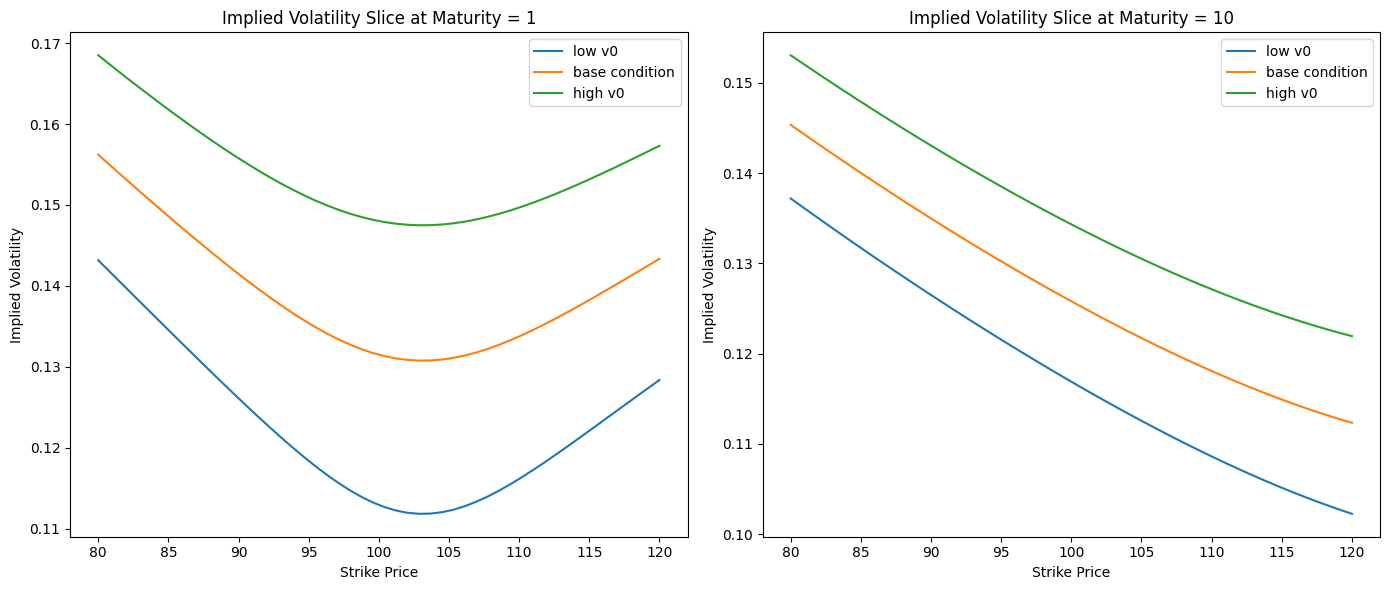

In [8]:
plot_imp_vol(Z_base, Z_v1, Z_v2, change_param='v0')

Changing eta

In [9]:
X_e1, Y_e1, Z_e1 = imp_vol(eta=0.015)

X_e2, Y_e2, Z_e2 = imp_vol(eta=0.025)

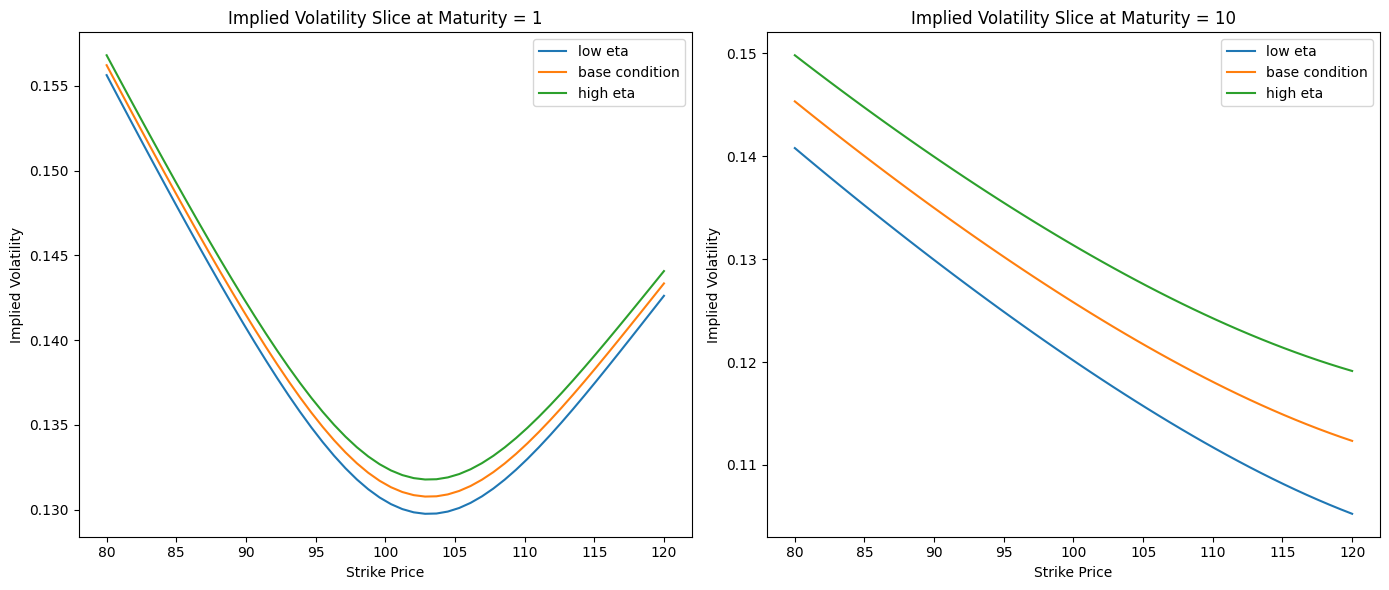

In [17]:
plot_imp_vol(Z_base, Z_e1, Z_e2, change_param='eta')

Changing Kappa

In [11]:
X_k1, Y_k1, Z_k1 = imp_vol(kappa=0.05)

X_k2, Y_k2, Z_k2 = imp_vol(kappa=0.2)

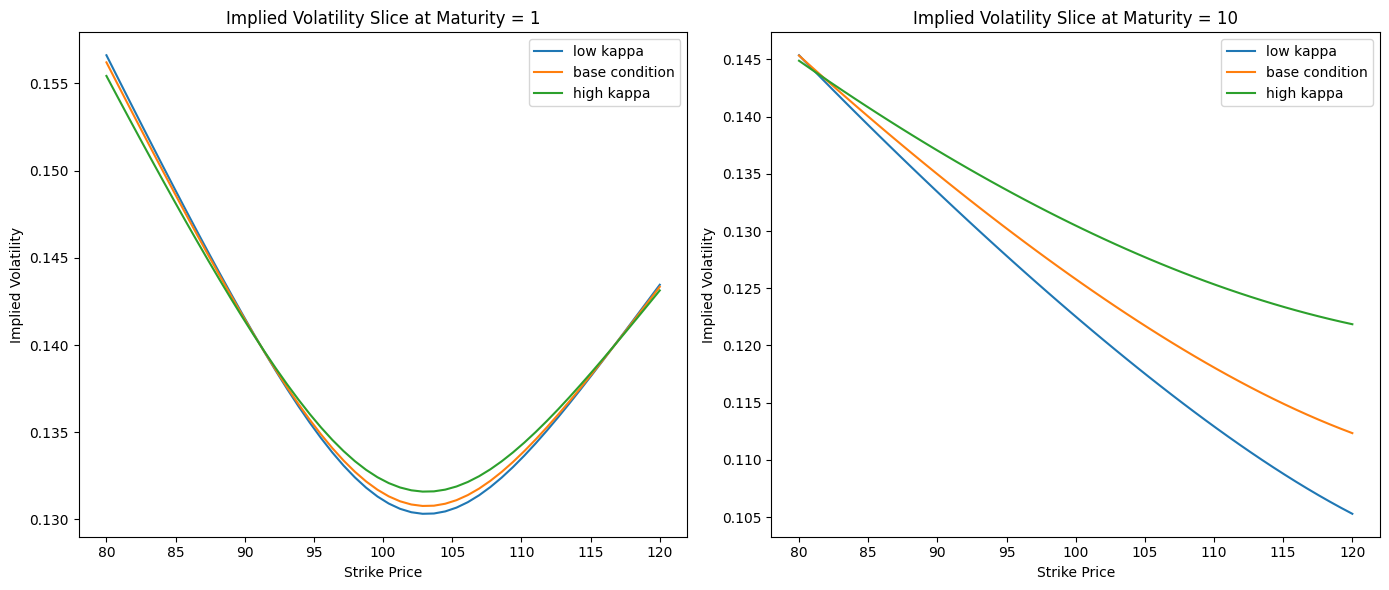

In [12]:
plot_imp_vol(Z_base, Z_k1, Z_k2, change_param='kappa')

Changing sigma(vol of vol)

In [13]:
X_s1, Y_s1, Z_s1 = imp_vol(sigma=0.1)

X_s2, Y_s2, Z_s2 = imp_vol(sigma=0.4)

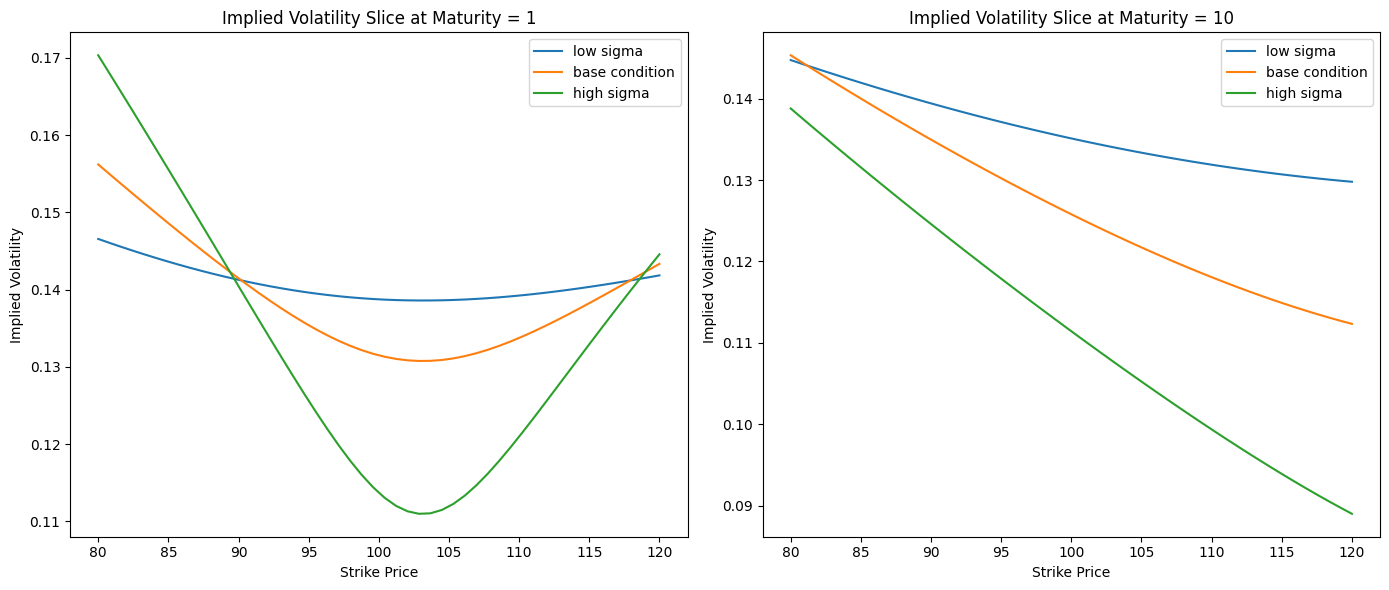

In [14]:
plot_imp_vol(Z_base, Z_s1, Z_s2, change_param='sigma')

Changing rho

In [18]:
X_r1, Y_r1, Z_r1 = imp_vol(rho=-0.6)

X_r2, Y_r2, Z_r2 = imp_vol(rho=0.6)

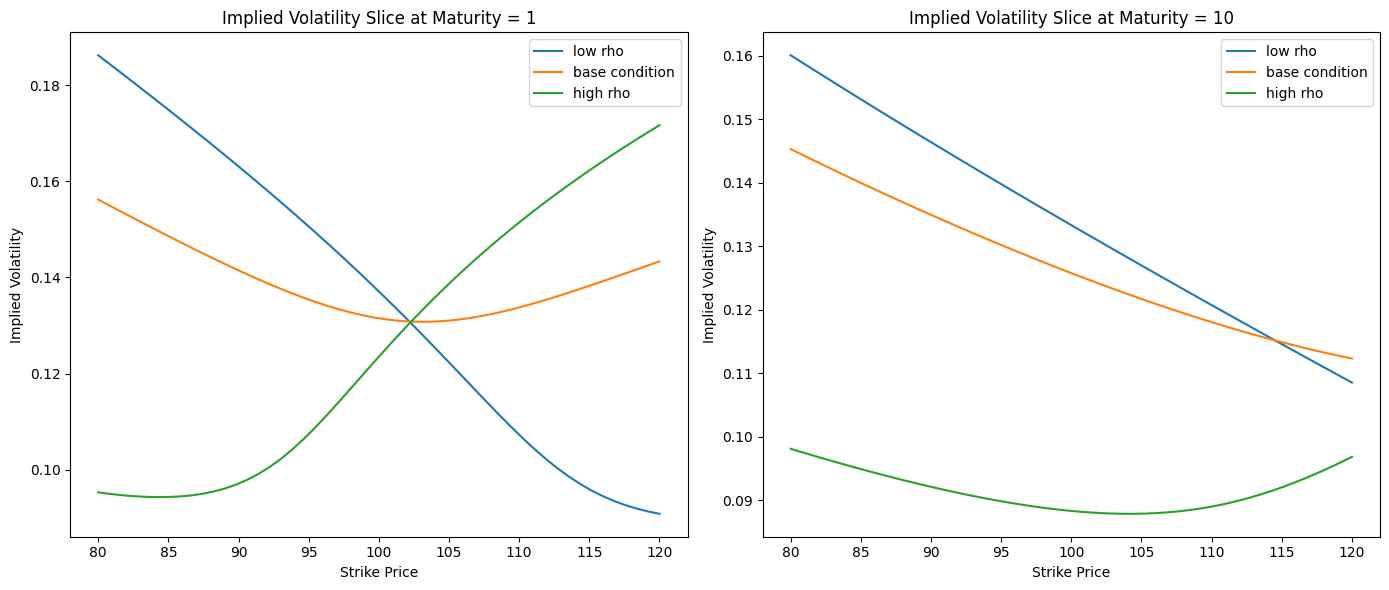

In [16]:
plot_imp_vol(Z_base, Z_r1, Z_r2, change_param='rho')